In [1]:
import cv2

In [2]:
import os

In [6]:
Images=[]
Labels=[]
for j in os.listdir("C:/Users/athir/Downloads/without_mask"):
        img = cv2.imread("C:/Users/athir/Downloads/without_mask/"+j)
        img=cv2.resize(img,(150,150))
        Images.append(img)
        Labels.append(0)
for k in os.listdir("C:/Users/athir/Downloads/with_mask"):
        img = cv2.imread("C:/Users/athir/Downloads/with_mask/"+k)
        img=cv2.resize(img,(150,150))
        Images.append(img)
        Labels.append(1)

In [7]:
import numpy as np
Features = np.array(Images)
Target=np.array(Labels)

In [8]:
Features.shape

(1376, 150, 150, 3)

In [9]:
Target.shape

(1376,)

In [10]:
import matplotlib.pyplot as plt

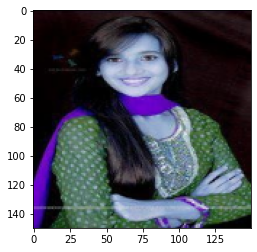

In [11]:
plt.imshow(Features[0])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_features,test_features,train_target,test_target = train_test_split(Features,Target,test_size=0.1)

In [14]:
train_features.shape

(1238, 150, 150, 3)

In [15]:
def transformations(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=img/255
    return img

In [16]:
train_features=np.array(list(map(transformations,train_features)))

In [17]:
train_features.shape

(1238, 150, 150)

In [18]:
train_features=train_features.reshape(1238,150,150,1)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
dataGen = ImageDataGenerator(rotation_range=10,width_shift_range = 0.1,height_shift_range = 0.1,shear_range = 0.1,zoom_range=0.2)

In [21]:
dataGen.fit(train_features)

In [22]:
id = dataGen.flow(train_features,train_target,batch_size=20)

In [23]:
x_batch,y_batch = next(id)

In [24]:
x_batch.shape

(20, 150, 150, 1)

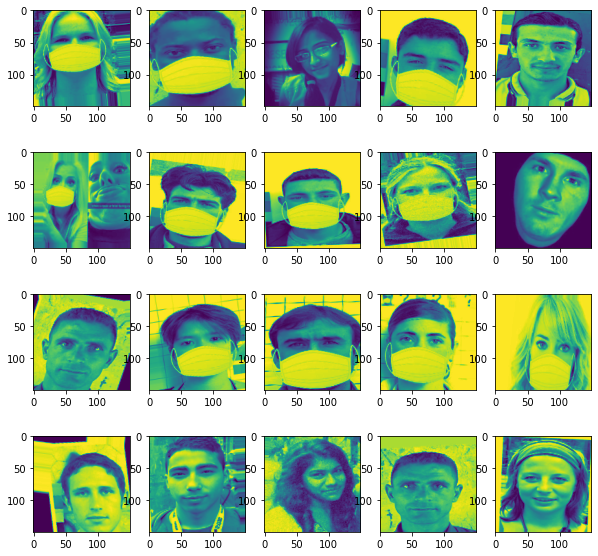

In [26]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_batch[i].reshape(150,150))

In [67]:
def cropface(img):
    plt.imshow(img)
    img = np.array(img, dtype='uint8')
    model1=cv2.CascadeClassifier("C:/Users/athir/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")
    faces=model1.detectMultiScale(img,1.03,1)
    x,y,w,h=faces
    x
    

ValueError: not enough values to unpack (expected 4, got 0)

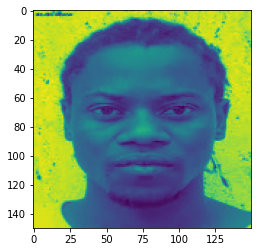

In [69]:
cropface(train_features[0])

In [ ]:
train_features=np.array(list(map(cropface,train_features)))

In [27]:
from keras.utils import to_categorical

In [28]:
train_target=to_categorical(train_target)

In [29]:
train_target.shape

(1238, 2)

# Specify the Architecture

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [32]:
model=Sequential()